# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.birch import birch, measurement_type
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cut_tree, linkage, dendrogram

from col_names import *
from utility import *
from clustering_utility import *

In [23]:
with open(f'{PICKLE_FOLDER}clustering_df.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}pure_clustering_df.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}user_selected_df.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}pure_user_selected_df.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [24]:
clustering_df_array = StandardScaler().fit_transform(clustering_df)
pure_clustering_df_array = StandardScaler().fit_transform(pure_clustering_df)

In [25]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## Hierarchical

In [26]:
def hierarchical_clustering(array, link_method, n_clusters, pure=0, algorithm_prefix='hierarchical_', scores_df=clustering_scores_df, dist_metric='euclidean', link_metric='euclidean', figsize=(15,12)):
    data_dist = pdist(array, metric=dist_metric)
    data_link = linkage(data_dist, method=link_method, metric=link_metric)
    plt.figure(figsize=figsize)
    if pure:
        plt.title(f'Pure hierarchical clustering - {link_method} method')
    else:
        plt.title(f'Hierarchical clustering - {link_method} method')

    dendrogram(data_link, color_threshold=10.0, truncate_mode='lastp')

    algorithm_prefix = 'pure_' + algorithm_prefix if pure else algorithm_prefix
    algorithm_name = algorithm_prefix + link_method

    store_clustering_scores(clustering_df_array, cut_tree(data_link, n_clusters=n_clusters)[:,0], algorithm_name=algorithm_name, scores_df=scores_df)
    return data_link

#### Link methods
- complete: equivalent to Farthest Point Algorithm
- single: equivalent to Nearest Point Algorithm
- average: metric is average of distances of all pairs of points in the two clusters
- centroid: metric is distance between centroids

In [27]:
methods = ['complete', 'single', 'average', 'centroid']

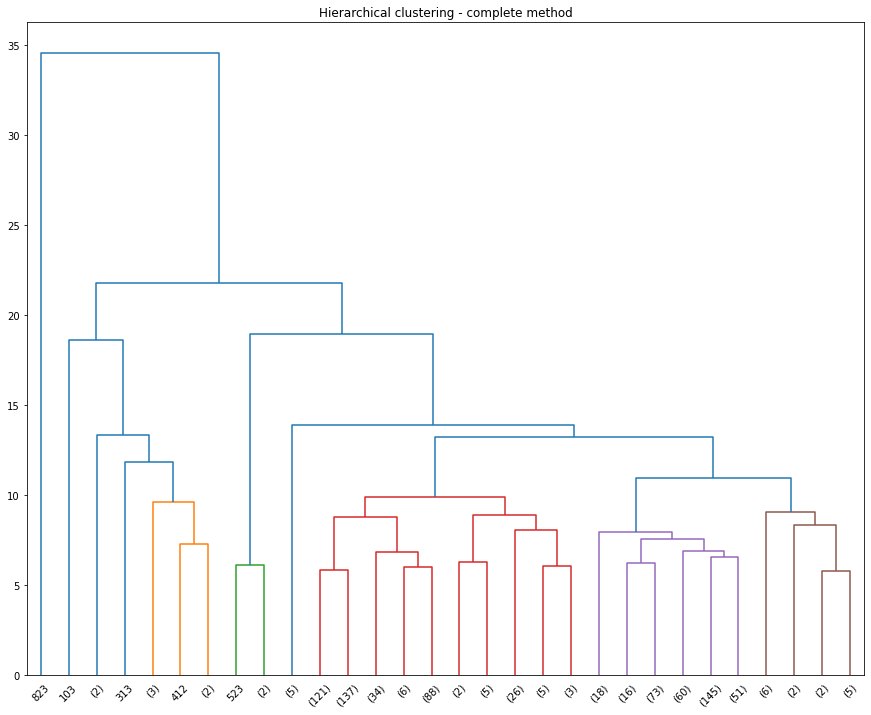

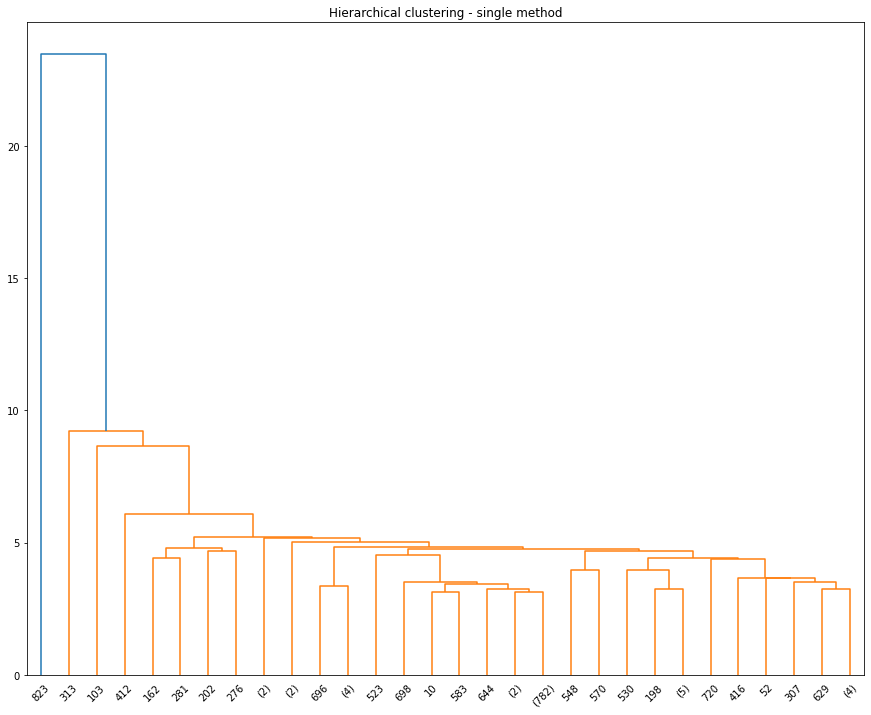

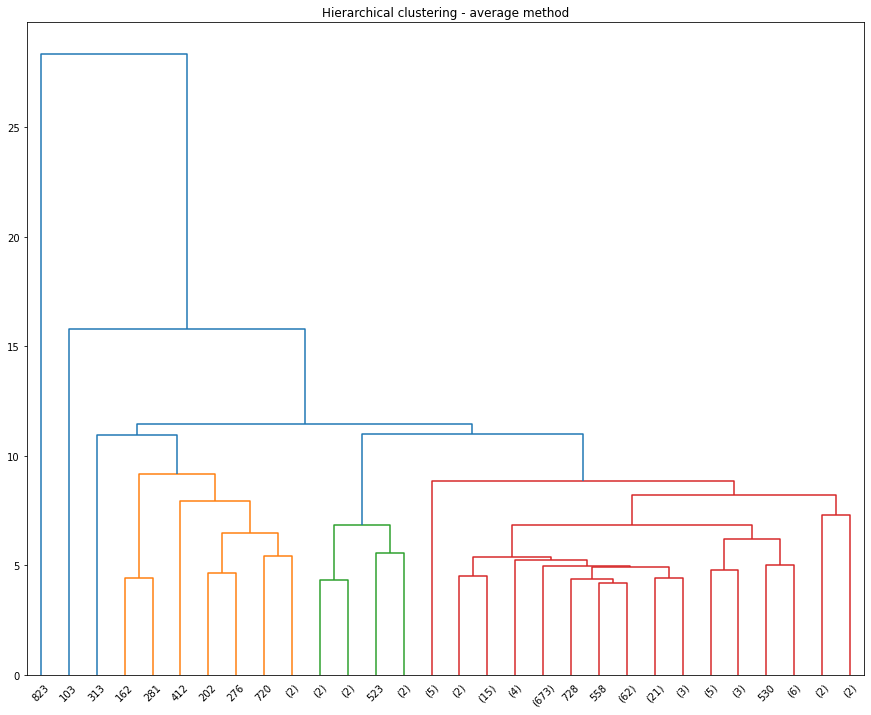

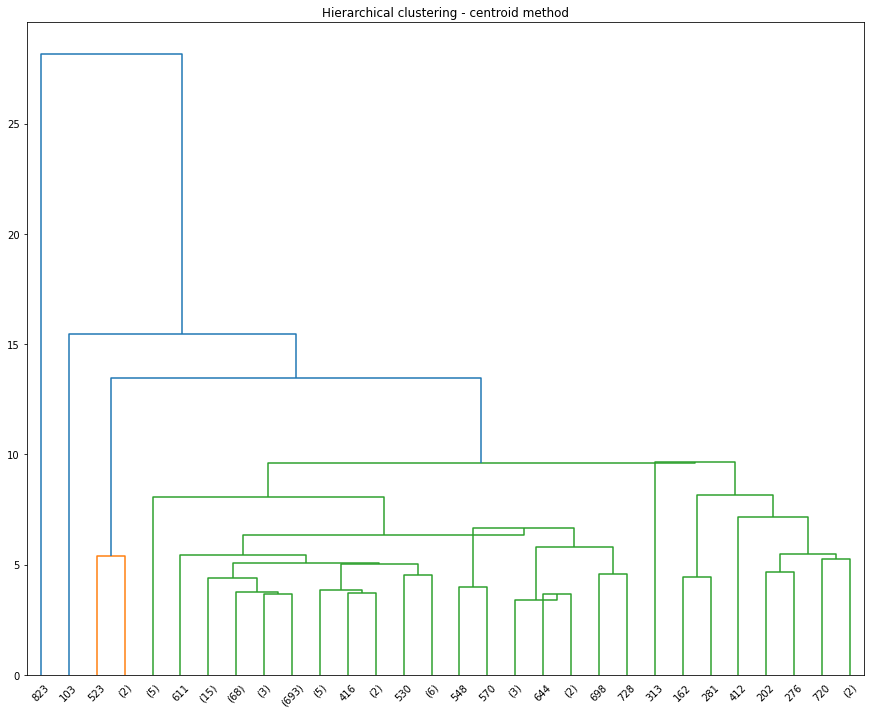

In [28]:
data_link_list = []
for method in methods:
    data_link_list.append(hierarchical_clustering(clustering_df_array, method, 8))

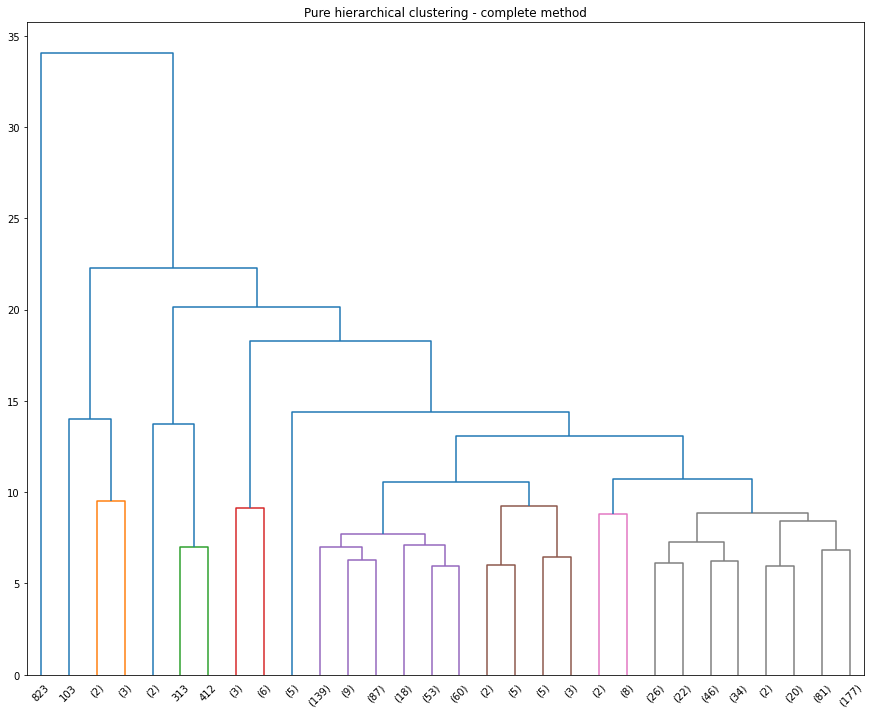

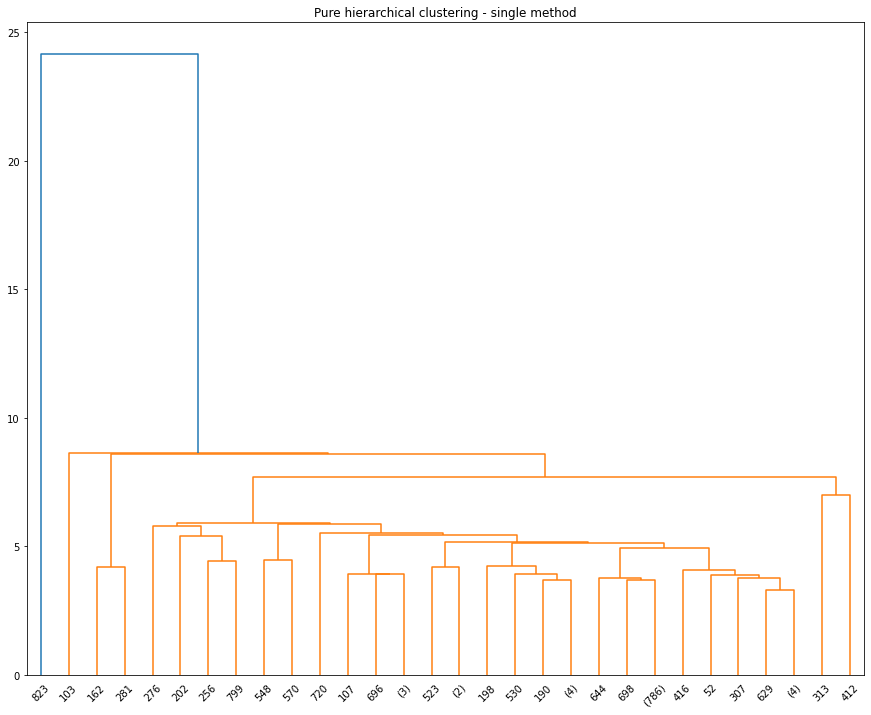

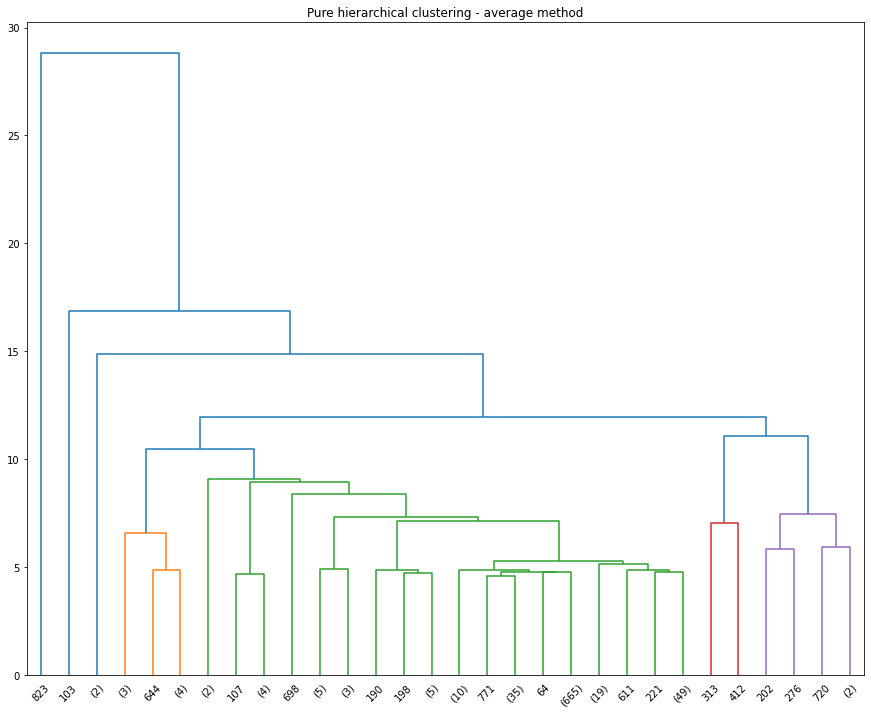

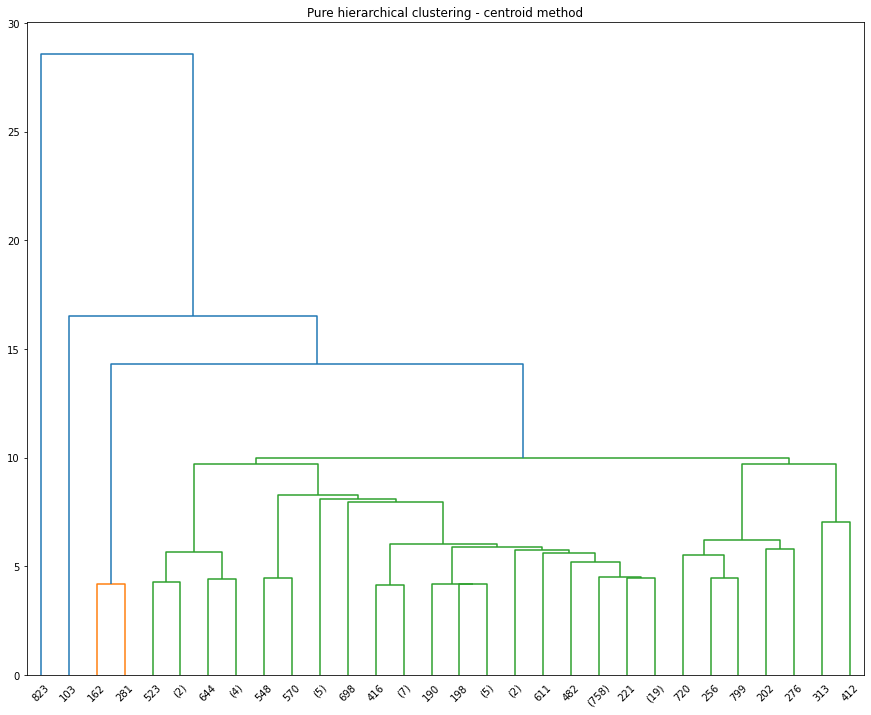

In [29]:
pure_data_link_list = []
for method in methods:
    pure_data_link_list.append(hierarchical_clustering(pure_clustering_df_array, method, 8, pure=1))

In [30]:
clustering_scores_df

,silhouette,SSE
hierarchical_complete,0.209208,6094.476838
hierarchical_single,0.537039,8286.739738
hierarchical_average,0.522395,7617.965280
hierarchical_centroid,0.844533,9918.527178
pure_hierarchical_complete,0.515092,7584.303695
pure_hierarchical_single,0.481093,8560.782258
pure_hierarchical_average,0.491426,7816.328420
pure_hierarchical_centroid,0.844533,9918.527178


We plot only the cluster analysis of the complete method for the complete dataframe, because the others do not achieve great scores

In [33]:
def show_clusters(data_link, array, df, n_clusters, figsize=(15,12)):
    labels = cut_tree(data_link, n_clusters=n_clusters)[:,0]
    centers = pd.DataFrame(array).groupby(cut_tree(data_link, n_clusters=n_clusters)[:,0]).mean()

    # clustering_plots(labels, centers, user_df.columns)
    new_labels, new_centers = reoder_labels(labels, centers)
    plot_clusters(new_labels, new_centers, df, figsize=figsize)

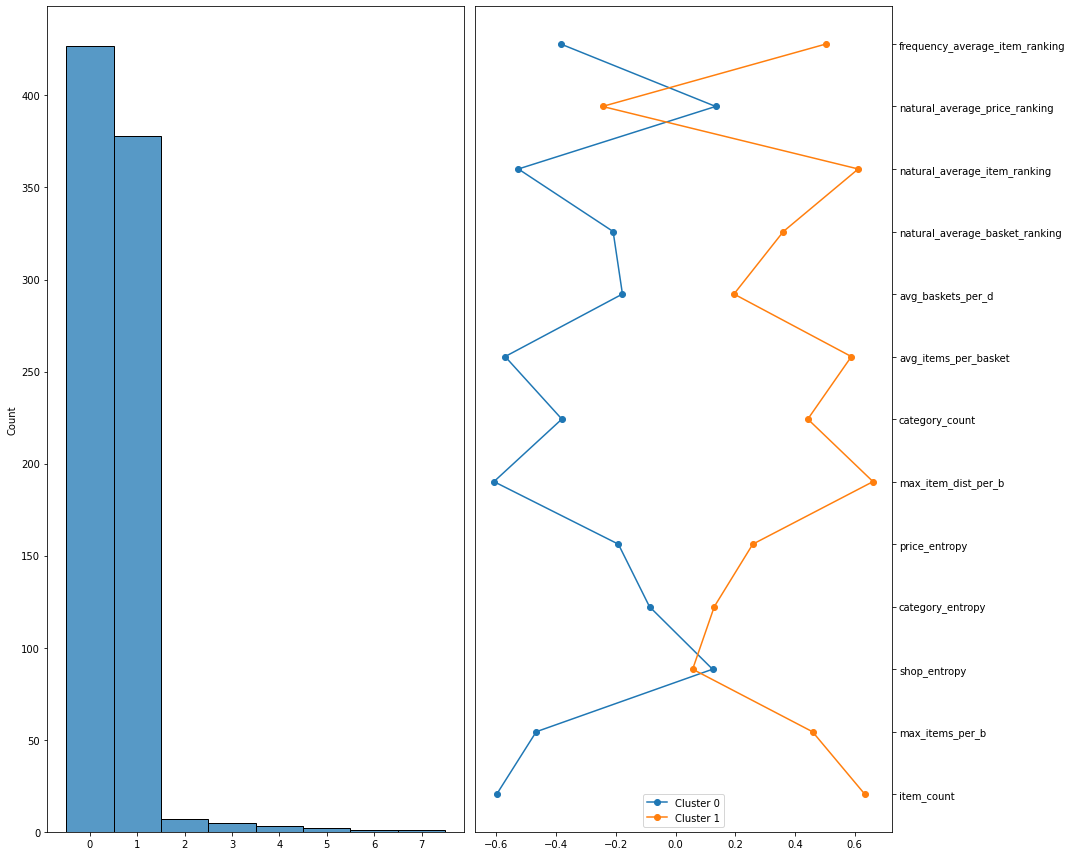

In [36]:
show_clusters(data_link_list[0], clustering_df_array, clustering_df, 8)

## FCM

In [257]:
initial_centers = kmeans_plusplus_initializer(data, 16, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
fcm_instance = fcm(data, initial_centers)
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()
# centers

In [258]:

sse = 0
for i, membership in enumerate(fcm_instance.get_membership()):
    distances_to_centers = [np.sqrt(np.sum((c - i) * (c - i))) for c in centers]
    sse += np.average(distances_to_centers, weights=membership)
clustering_scores.loc['fuzzy_C_Means', 'SSE'] = sse
sse

1222558.2779248357

In [259]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.show(pair_filter=[[0, 1], [0, 2]])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## BSAS

In [ ]:
max_clusters = 6
threshold = 0.001
bsas_instance = bsas(data, max_clusters, threshold)
bsas_instance.process()

In [ ]:
clusters = bsas_instance.get_clusters()
representatives= bsas_instance.get_representatives()

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.show(max_row_size=2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
bsas_visualizer.show_clusters(data, clusters, representatives)

ValueError: Only objects with size dimension 1 (1D plot), 2 (2D plot) or 3 (3D plot) can be displayed. For multi-dimensional data use 'cluster_visualizer_multidim'.

## BIRCH

In [ ]:
birch_instance = birch(data, 6, 3)
birch_instance.process()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
clusters = bsas_instance.get_clusters()
representatives = representatives = bsas_instance.get_representatives()

In [ ]:
bsas_visualizer.show_clusters(c_df, clusters, representatives)

KeyError: 0